<a href="https://colab.research.google.com/github/Fluffy96/Computer-Vision-using-CNN/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(Xtr,ytr),(Xts,yts) = datasets.cifar10.load_data()
print(Xtr.shape)
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# y is filled with numbers and the number repsents and index for one of the classifications above

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)


from the shape above we can tell we have 50000 images of size 32px by 32px and we have 3 channels

In [ ]:
print(ytr.shape)#shows that it is a 2d array do steps below to reshape into 1d
ytr = ytr.reshape(-1,)
yts = yts.reshape(-1,)
print(ytr.shape)

(50000, 1)
(50000,)


this sample is frog


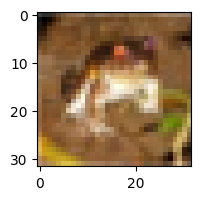

In [ ]:
def plot(X,y,ind):#Simple function to print out the image and its label
  plt.figure(figsize=(15,2))
  plt.imshow(X[ind])
  print('this sample is '+ classes[y[ind]])

plot(Xtr,ytr,0)

Normalizing image data<br>
1. Divide by 255.0 ( want number between 1 and 0)

In [ ]:
Xtr = Xtr/255.0
Xts = Xts/255.0

In [ ]:
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.AveragePooling2D(),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])


In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
cnn.fit(Xtr,ytr,epochs =12)

Epoch 1/12
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5034 - accuracy: 0.4593
Epoch 2/12
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1722 - accuracy: 0.5881
Epoch 3/12
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0341 - accuracy: 0.6392
Epoch 4/12
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9444 - accuracy: 0.6714
Epoch 5/12
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8797 - accuracy: 0.6967
Epoch 6/12
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8245 - accuracy: 0.7156
Epoch 7/12
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7789 - accuracy: 0.7295
Epoch 8/12
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7354 - accuracy: 0.7446
Epoch 9/12
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6995 - accuracy: 0.7573
Epoch 10/12
1563/1563 [==============================] - 66s 42m

In [ ]:
cnn.evaluate(Xts,yts)

313/313 [==============================] - 4s 12ms/step - loss: 0.9063 - accuracy: 0.7055


[0.9063353538513184, 0.7055000066757202]

this sample is ship


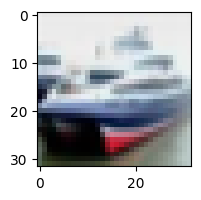

In [ ]:
plot(Xts,yts,1)

In [ ]:
pred = cnn.predict(Xts)
cl = np.argmax(pred[1]) #returns which of the 12 vectors was the largest repersents the classification
print(classes[cl])

313/313 [==============================] - 4s 12ms/step
ship
